# Chapter 12 Lab - Unsupervised Learning

## Principal Components Analysis

In [1]:
str(USArrests)

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


In [2]:
summary(USArrests)

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

In [3]:
dimnames(USArrests)

[[1]]
 [1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"       

[[2]]
[1] "Murder"   "Assault"  "UrbanPop" "Rape"

In [4]:
apply(USArrests, 2, mean)

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [5]:
apply(USArrests, 2, var)

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

- Variances of the 4 variables are very different so we standardize (scale) before applying PCA

In [6]:
?prcomp

prcomp {stats},R Documentation
formula,"a formula with no response variable, referring only to numeric variables."
data,an optional data frame (or similar: see model.frame) containing the variables in the formula formula. By default the variables are taken from environment(formula).
subset,an optional vector used to select rows (observations) of the data matrix x.
na.action,"a function which indicates what should happen when the data contain NAs. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit."
...,arguments passed to or from other methods. If x is a formula one might specify scale. or tol.
x,a numeric or complex matrix (or data frame) which provides the data for the principal components analysis.
retx,a logical value indicating whether the rotated variables should be returned.
center,"a logical value indicating whether the variables should be shifted to be zero centered. Alternately, a vector of length equal the number of columns of x can be supplied. The value is passed to scale."
scale.,"a logical value indicating whether the variables should be scaled to have unit variance before the analysis takes place. The default is FALSE for consistency with S, but in general scaling is advisable. Alternatively, a vector of length equal the number of columns of x can be supplied. The value is passed to scale."
tol,"a value indicating the magnitude below which components should be omitted. (Components are omitted if their standard deviations are less than or equal to tol times the standard deviation of the first component.) With the default null setting, no components are omitted (unless rank. is specified less than min(dim(x)).). Other settings for tol could be tol = 0 or tol = sqrt(.Machine$double.eps), which would omit essentially constant components."


In [7]:
pca.out <- prcomp(USArrests, scale = TRUE)
pca.out # stdevs of the 4 PCs and the loadings of the 4 PCs

Standard deviations (1, .., p=4):
[1] 1.5748783 0.9948694 0.5971291 0.4164494

Rotation (n x k) = (4 x 4):
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432

In [8]:
names(pca.out)
str(pca.out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

List of 5
 $ sdev    : num [1:4] 1.575 0.995 0.597 0.416
 $ rotation: num [1:4, 1:4] -0.536 -0.583 -0.278 -0.543 0.418 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "Murder" "Assault" "UrbanPop" "Rape"
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 $ center  : Named num [1:4] 7.79 170.76 65.54 21.23
  ..- attr(*, "names")= chr [1:4] "Murder" "Assault" "UrbanPop" "Rape"
 $ scale   : Named num [1:4] 4.36 83.34 14.47 9.37
  ..- attr(*, "names")= chr [1:4] "Murder" "Assault" "UrbanPop" "Rape"
 $ x       : num [1:50, 1:4] -0.976 -1.931 -1.745 0.14 -2.499 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:50] "Alabama" "Alaska" "Arizona" "Arkansas" ...
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 - attr(*, "class")= chr "prcomp"


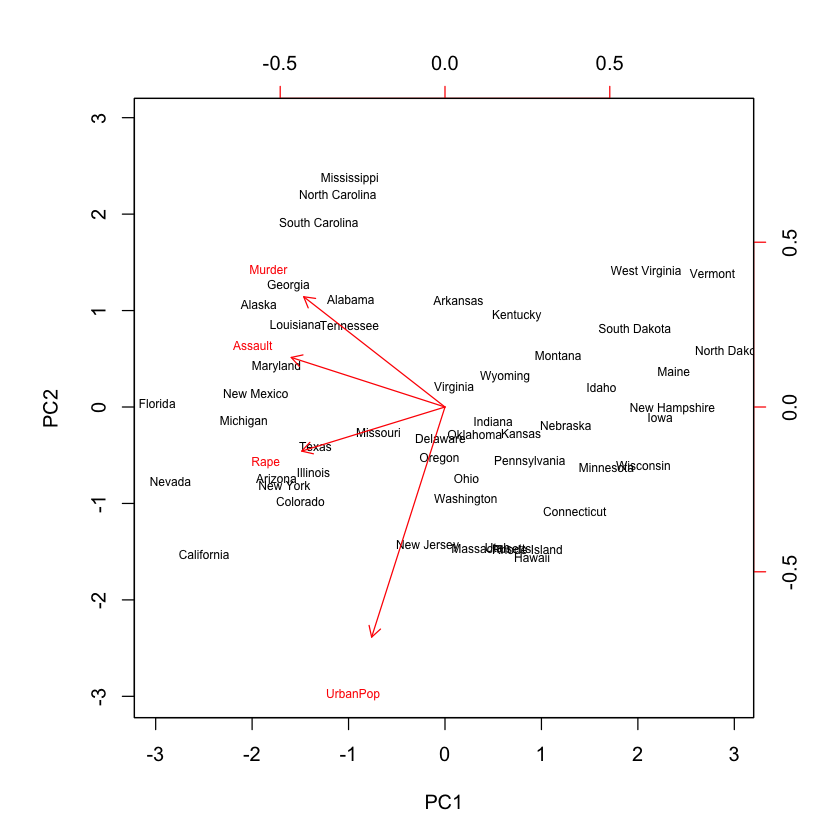

In [9]:
biplot(pca.out, scale = 0, cex = 0.6)

## k-Means Clustering

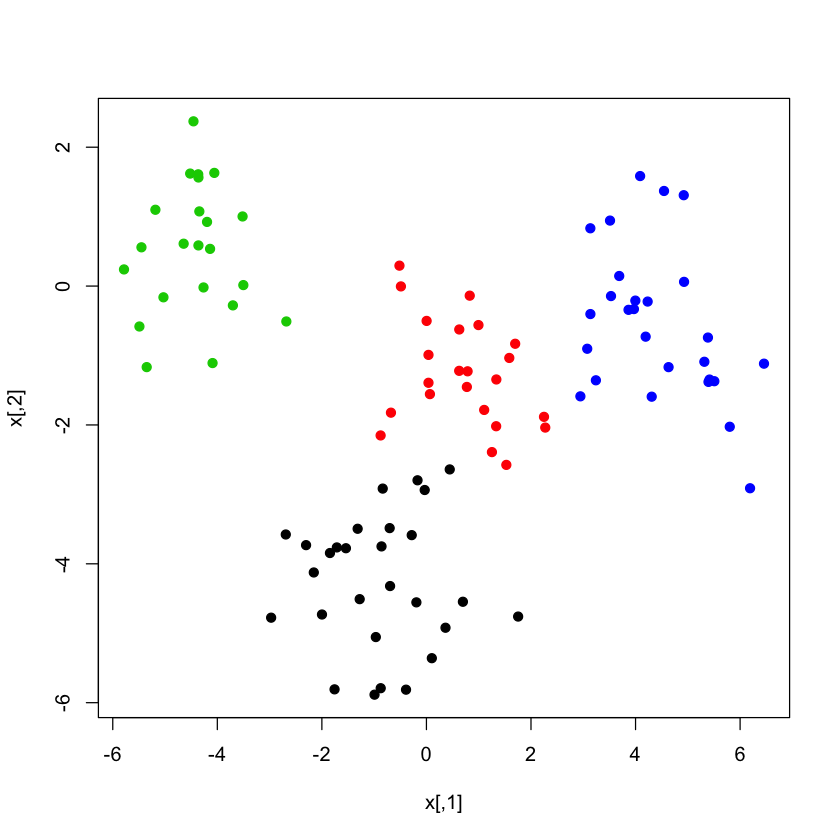

In [10]:
# create random 2D data

set.seed(103)
x <- matrix(rnorm(100*2), nrow = 100, ncol = 2)
xmean <- matrix(rnorm(8, sd = 4), nrow = 4, ncol = 2) # centers of the 4 clusters
which_clust <- sample(1:4, 100, replace = TRUE) # randomly assign the 100 pts to the 4 clusters
x <- x + xmean[which_clust, ] # create the dataset
plot(x, col = which_clust, pch = 19)

In [11]:
# run kmeans

x_kmeans <- kmeans(x, 4, nstart = 100)
x_kmeans

K-means clustering with 4 clusters of sizes 25, 26, 27, 22

Cluster means:
        [,1]       [,2]
1 -1.0176206 -4.4351200
2  0.6473566 -1.4472257
3  4.4226157 -0.5455123
4 -4.4314673  0.5278534

Clustering vector:
  [1] 4 4 1 1 1 4 2 1 4 3 3 4 1 1 3 1 3 2 3 2 1 2 4 1 2 2 2 2 3 4 2 4 2 1 1 4 4
 [38] 2 1 4 2 3 1 2 4 1 2 3 2 2 3 3 3 2 3 3 1 4 2 1 3 2 1 4 2 3 2 1 1 3 3 2 4 4
 [75] 4 1 4 3 3 4 2 1 2 3 3 1 3 2 3 4 2 1 3 3 1 4 1 4 3 3

Within cluster sum of squares by cluster:
[1] 45.74724 38.37492 57.29163 30.26913
 (between_SS / total_SS =  88.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

           
which_clust  1  2  3  4
          1 25  3  0  0
          2  0 23  0  0
          3  0  0  0 22
          4  0  0 27  0

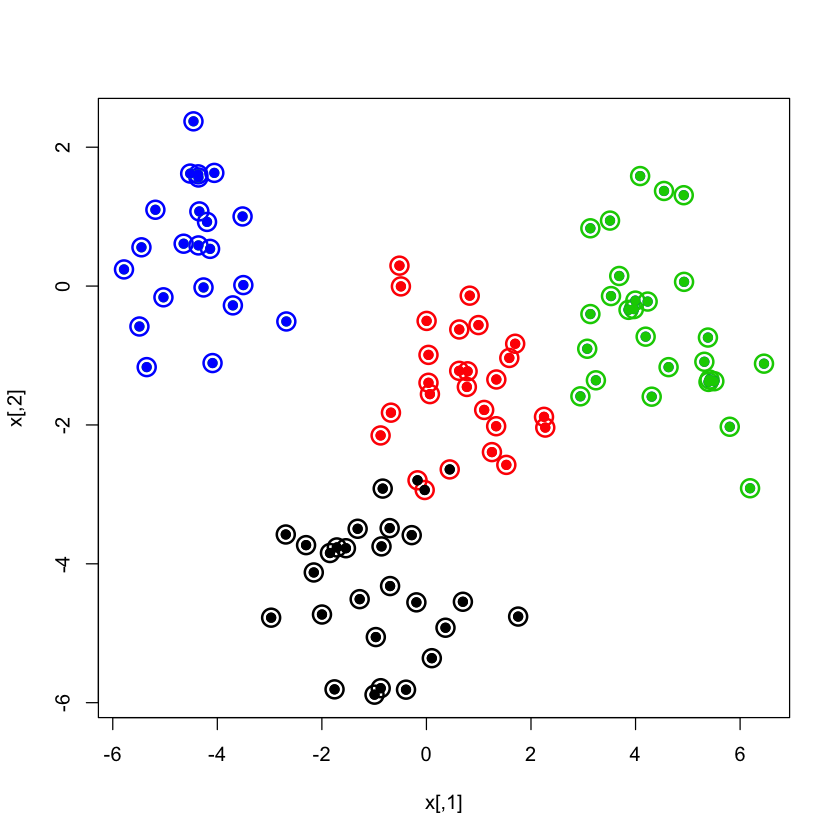

In [12]:
# plot kmeans result and compare to true clusters

plot(x, col = x_kmeans$cluster, 
     cex = 2, pch = 1, lwd = 2)
points(x, col = which_clust, pch = 19) # color mismatch due to random kmeans cluster numbering!
table(which_clust, x_kmeans$cluster)
points(x, col = c(1, 2, 4, 3)[which_clust], pch = 19) # corrects color mismatch; based on table